# SDSS DR18 Galaxy Classification
### STARFORMING vs STARBURST Prediction using Machine Learning


# 1. Introduction
Galaxies exhibit a wide range of physical properties, evolutionary stages, and star-formation behaviors. Among these, two important categories are **starforming** galaxies—those forming stars at a steady, sustained rate—and **starburst** galaxies, which undergo brief but extremely intense episodes of star formation. Understanding the differences between these galaxy types provides insight into the physical processes that influence galaxy evolution, including gas accretion, mergers, and environmental interactions.

In this project, I apply machine learning techniques to classify galaxies as either **STARFORMING** or **STARBURST** using photometric and structural data from the Sloan Digital Sky Survey Eighteenth Data Release (SDSS DR18). The dataset contains 100,000 galaxy observations with features such as sky coordinates, photometric magnitudes, band-specific axis ratios, redshift, and other SDSS-derived measurements.

The objective of this work is to build an end-to-end machine learning pipeline that includes exploratory data analysis, preprocessing, feature scaling, model development, and performance evaluation. Two supervised learning models are implemented—**Logistic Regression** and a **Random Forest Classifier**—to determine how well galaxy subclasses can be predicted from their observable properties. This project demonstrates the use of machine learning as a scientific analysis tool and evaluates which modeling approach provides the best performance for galaxy subclassification.


# 2. Imports


In [22]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Misc
import warnings
warnings.filterwarnings("ignore")


# 2. Data Loading
In this section, I load the SDSS DR18 galaxy dataset into a Pandas DataFrame and perform an initial inspection to confirm that the data has been imported correctly. This includes previewing the first few rows, checking the dataset dimensions, and reviewing the column names.


In [15]:
df = pd.read_csv("../data/sdss_100k_galaxy_form_burst.csv", comment="#", sep=",")
df.head()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1237648702973083853,332152325571373056,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
4,1237648702973149350,332154249716721664,198.706864,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,GALAXY,STARFORMING,0.136658,0.000021


In [16]:
df.shape

(100000, 43)

In [17]:
df.columns

Index(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z',
       'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i',
       'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_i', 'petroRad_r',
       'petroRad_z', 'petroFlux_u', 'petroFlux_g', 'petroFlux_i',
       'petroFlux_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i',
       'petroR50_r', 'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g',
       'psfMag_i', 'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i',
       'expAB_z', 'class', 'subclass', 'redshift', 'redshift_err'],
      dtype='object')

The dataset has the dimensions shown above and includes the features and target variable needed for galaxy subclass classification.

# 3. Exploratory Data Analysis (EDA)
This section explores the structure and statistical properties of the dataset. 
The goal is to better understand:

- Class distribution
- Summary statistics
- Missing values
- Feature distributions
- Correlations among numeric features

This analysis guides the preprocessing and modeling decisions in later sections.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  int64  
 1   specobjid     100000 non-null  uint64 
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    100000 non-null  float64
 18  petro

The information above describes data types, non-null counts, and memory usage. This helps identify which columns are numeric, which may require encoding, and whether missing values are present.

In [20]:
df.describe()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,redshift_err
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237659e+18,2.303595e+18,180.577802,23.472475,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,...,18.834259,18.020203,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.116753,0.000179
std,6.103756e+12,2.531359e+18,75.751994,21.140744,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,...,105.079620,100.181687,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.100169,0.052189
min,1.237646e+18,2.994897e+17,0.008745,-11.244273,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-0.000833,0.000002
25%,1.237655e+18,8.130687e+17,138.741880,3.120118,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,...,19.257783,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.055836,0.000008
50%,1.237659e+18,1.457564e+18,181.492972,20.913596,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,...,19.763915,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.085850,0.000011
75%,1.237663e+18,2.367902e+18,223.851863,42.259965,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,...,20.408775,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,0.135148,0.000015
max,1.237681e+18,1.412691e+19,359.997922,68.695258,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,...,26.174400,25.966680,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,0.572899,16.503710


The table above provides summary statistics for the numerical features in the dataset. 
These values offer insight into the typical ranges, central tendencies, and variability of 
key astrophysical measurements. The mean and standard deviation reveal how spread out the 
photometric and structural properties are, while the minimum and maximum values help identify 
potential outliers or unusual observations. Overall, these statistics confirm that the dataset 
contains a wide range of galaxy properties suitable for training machine learning models.

## Class Distribution

Understanding the target variable distribution is essential, as class imbalance can affect model performance.


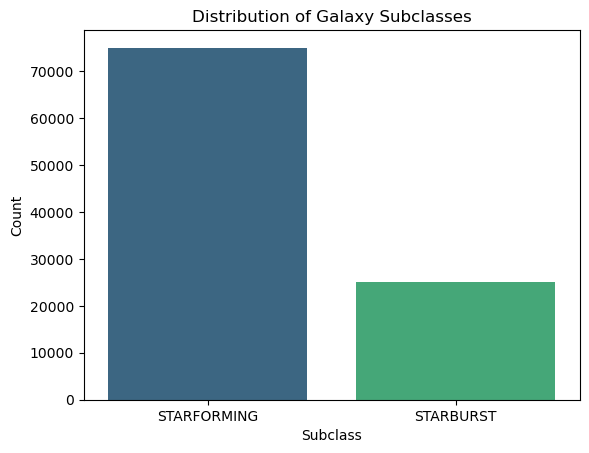

In [21]:
sns.countplot(x='subclass', data=df, palette='viridis')
plt.title("Distribution of Galaxy Subclasses")
plt.xlabel("Subclass")
plt.ylabel("Count")
plt.show()

The histogram above shows the distribution of the two galaxy subclasses in the dataset. 
STARFORMING galaxies make up the majority of the samples (approximately 75%), while STARBURST 
galaxies account for the remaining 25%. Although the classes are not perfectly balanced, the 
minority class still has a sufficiently large number of examples to support effective model 
training. Mild class imbalance will be addressed during modeling using appropriate evaluation 
metrics and, if necessary, class weighting.

In [24]:
df.isna().sum().sort_values(ascending=False)

objid           0
specobjid       0
ra              0
dec             0
u               0
g               0
r               0
i               0
z               0
modelFlux_u     0
modelFlux_g     0
modelFlux_r     0
modelFlux_i     0
modelFlux_z     0
petroRad_u      0
petroRad_g      0
petroRad_i      0
petroRad_r      0
petroRad_z      0
petroFlux_u     0
petroFlux_g     0
petroFlux_i     0
petroFlux_r     0
petroFlux_z     0
petroR50_u      0
petroR50_g      0
petroR50_i      0
petroR50_r      0
petroR50_z      0
psfMag_u        0
psfMag_r        0
psfMag_g        0
psfMag_i        0
psfMag_z        0
expAB_u         0
expAB_g         0
expAB_r         0
expAB_i         0
expAB_z         0
class           0
subclass        0
redshift        0
redshift_err    0
dtype: int64

The information above shows there are no missing values in the dataset.

## Feature Distributions

Below are histograms of selected numerical features to visualize their distribution.


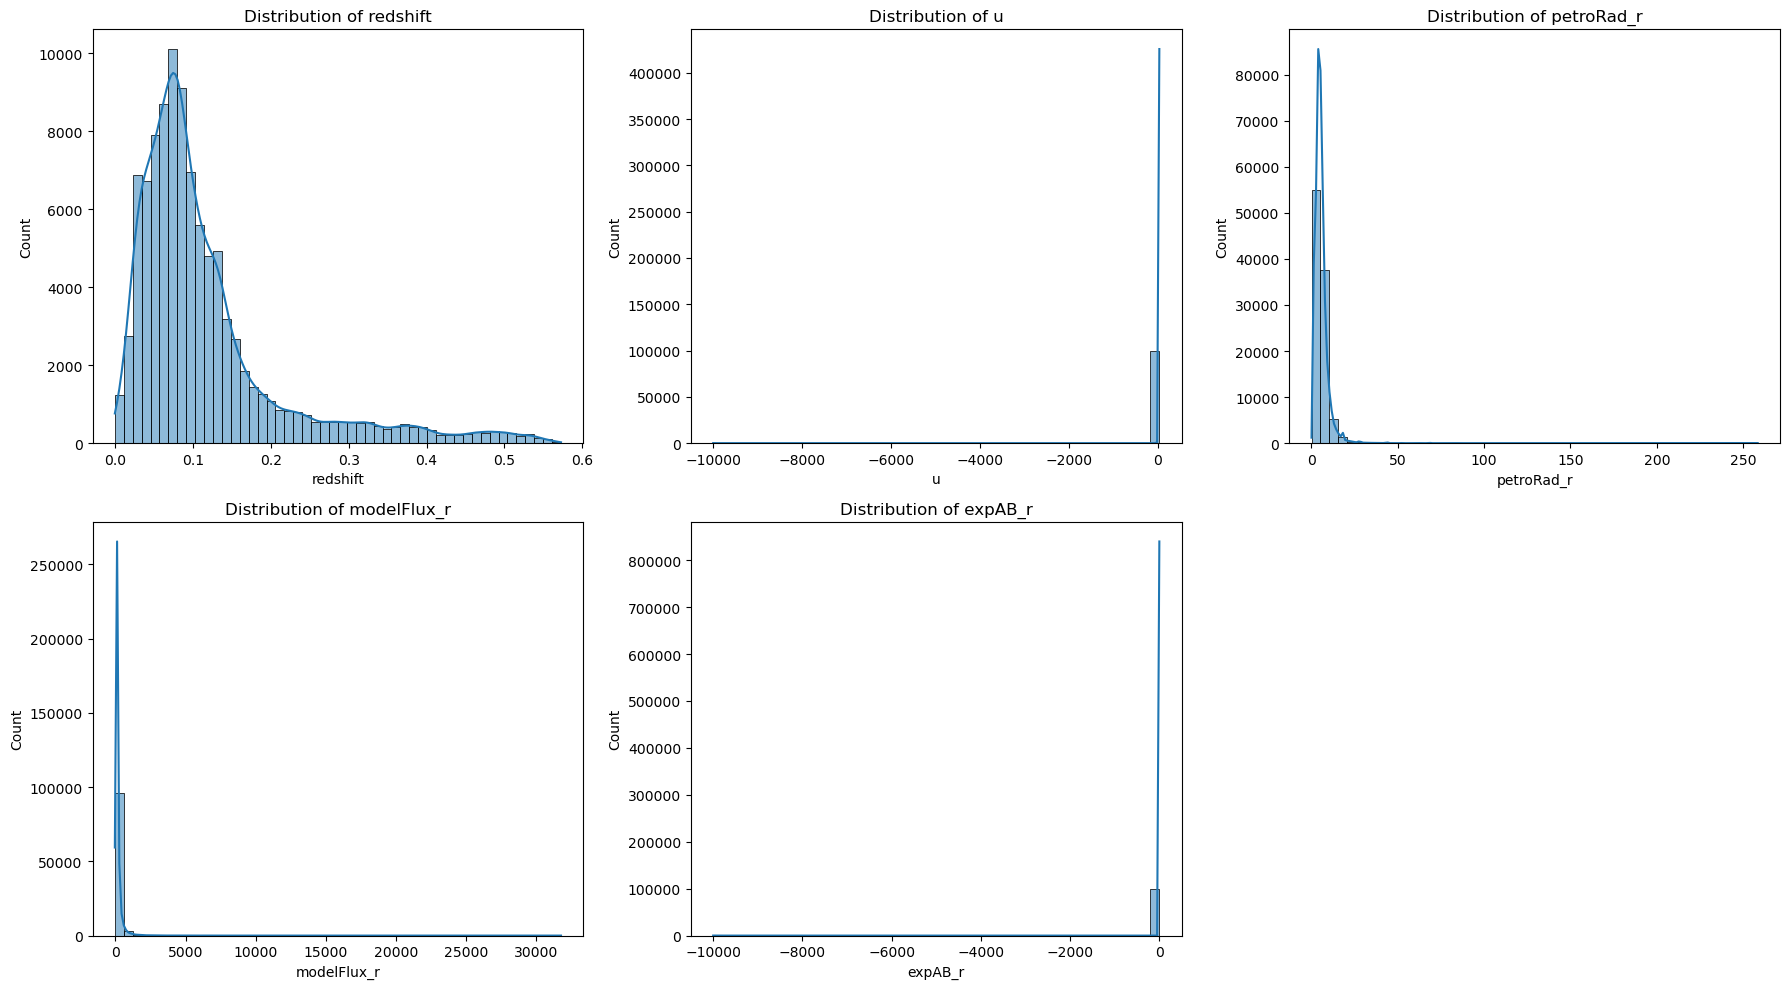

In [31]:
numeric_cols = ['redshift', 'u', 'petroRad_r', 'modelFlux_r', 'expAB_r']

# Create a 2x3 grid (6 slots total)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Turn off the unused subplot (slot #5 since indexing starts at 0)
axes[-1].axis('off')

plt.tight_layout()
plt.show()


Several photometric features (such as u, g, r magnitudes and Petrosian radii across 
multiple bands) displayed nearly identical distributions. Because these measurements 
are highly correlated in SDSS imaging, I retained only one representative feature from 
each group (brightness, size, flux, and shape) to keep the EDA concise and avoid redundancy.


## Correlation Heatmap

The heatmap below shows how numeric features correlate with one another.


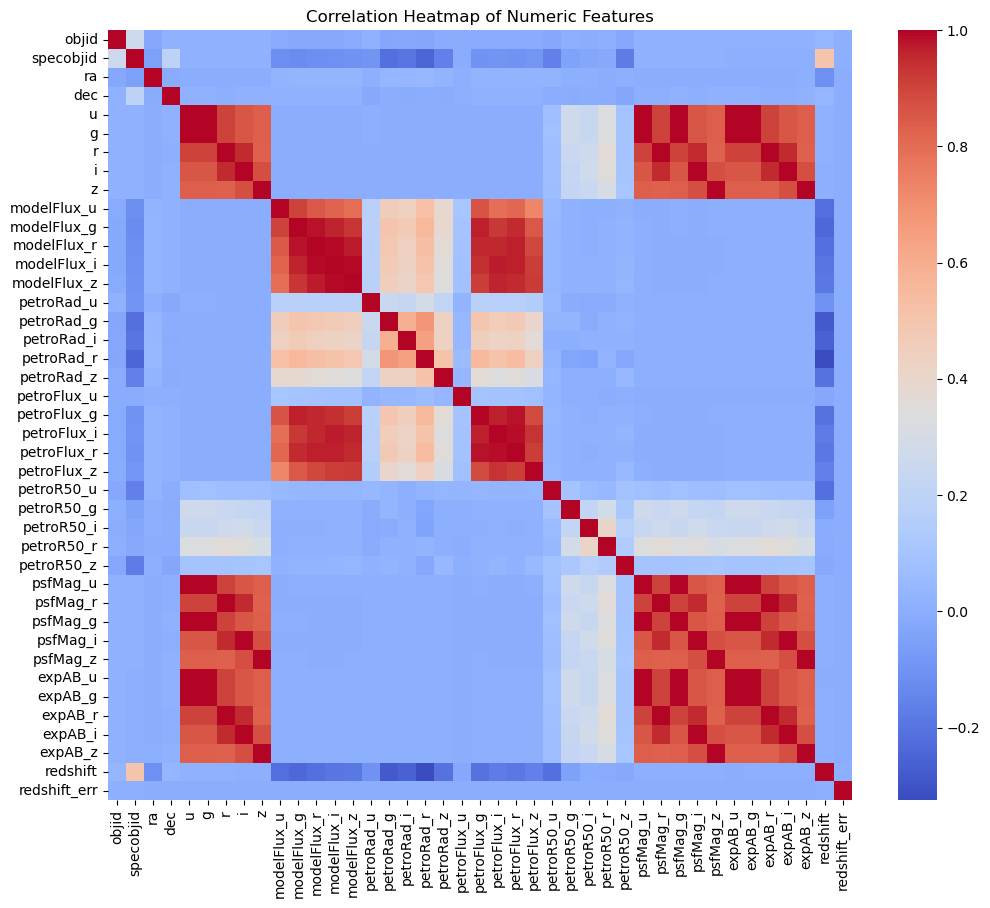

In [32]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


### Summary of EDA Observations 

- **The dataset contains 100,000 rows and 43 features**, according to `df.info()`, providing a sufficiently large and high-dimensional dataset for machine learning.

- **The class distribution shows a noticeable imbalance**, with the *STARFORMING* subclass making up roughly 75% of samples and the *STARBURST* subclass around 25%. This imbalance is moderate and may influence model performance, so it should be considered during evaluation.

- **Missing value inspection indicates that there are no missing values**, as all features contain 100,000 non-null entries. No imputation is required.

- **Feature distributions appear highly skewed**, especially for flux, magnitude, and radius measurements. These long-tailed distributions are typical of SDSS astrophysical data, where brightness and size span several orders of magnitude. The redshift distribution peaks near 0.1 and declines rapidly, consistent with expectations for nearby galaxy surveys.

- **The correlation matrix reveals strong feature redundancy**, with clear clusters of highly correlated magnitudes (`u, g, r, i, z`), modelFlux measurements, Petrosian radii, and Petrosian fluxes. Many features encode overlapping information, indicating that feature selection or dimensionality reduction may be beneficial.

**Overall, these observations suggest that preprocessing should address feature scaling, consider reducing redundant variables, and account for class imbalance during model training and evaluation.**
